In [1]:
%load_ext autoreload
%autoreload 2

In [50]:
from cooccurrence import *
from glob import glob
from time import time
import helper
import sys
import networkx as nx
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import dataset_helper
import preprocessing

In [128]:
%%time
X_all, Y_all = dataset_helper.get_dataset('ng20', preprocessed=True, preprocessing_args = {'remove_stopwords_': True, 'remove_interpunction_': True})

CPU times: user 774 ms, sys: 156 ms, total: 930 ms
Wall time: 18.8 s


In [131]:
%%time

if 0==1:
    X, Y = X[:1000], Y[:1000]
else:
    X, Y = X_all, Y_all
def get_mats(X, n_jobs = 4, **kwargs):
    return Parallel(n_jobs=n_jobs)(delayed(get_coocurrence_matrix)(d, **kwargs) for d in X)

mats = get_mats(X)

CPU times: user 10.8 s, sys: 1.05 s, total: 11.9 s
Wall time: 1min 29s


extended        -> cab                  (weight: 2)
extended        -> 4x4                  (weight: 2)
new             -> brand                (weight: 2)
new             -> bought               (weight: 2)
duty            -> light                (weight: 2)
grady           -> nh                   (weight: 2)
brand           -> bought               (weight: 2)
brand           -> time                 (weight: 2)
may             -> many                 (weight: 2)
time            -> bought               (weight: 2)
rust            -> paint                (weight: 2)
chevrolet       -> buy                  (weight: 2)
problems        -> many                 (weight: 2)


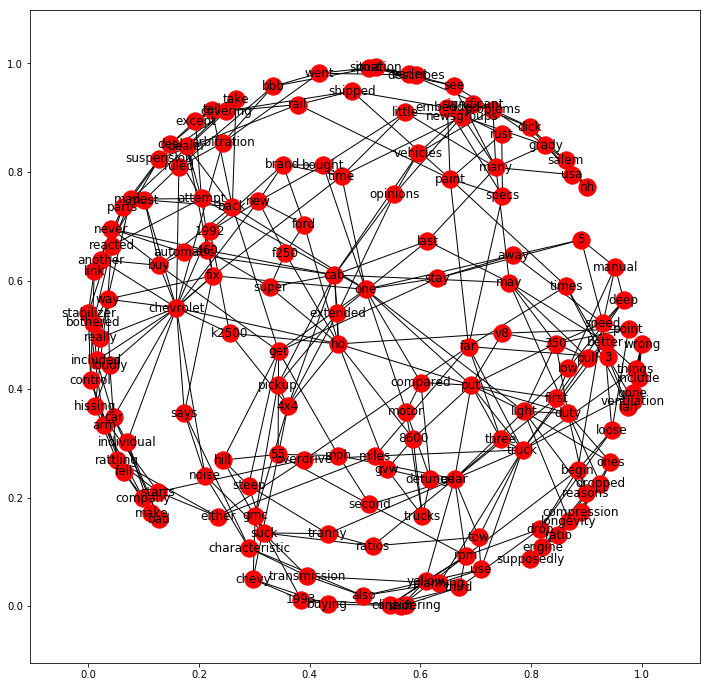

rec.autos considering buying 1993 chevy gmc 4x4 pickup extended cab opinions vehicles significant problems dick grady salem nh usa grady many newsgroups little time bought brand new 1992 chevrolet k2500 hd 4x4 extended cab last may many many problems see earler post describes situation went bbb arbitration ruled chevrolet must buy back get one stay away 5 speed manual deep low first gear put three truck far miles overdrive either starts rattling hissing loudly way fix chevrolet says noise characteristic transmission also planning use truck tow gear ratios tranny suck steep hill get 55 mph second gear rpm yellow line shift third rpm drop begin loose speed point 350 v8 put hd 8600 gvw trucks detuned motor compared one put light duty ones dropped compression ratio supposedly engine longevity reasons light duty 350 may pull better truck things gone wrong include ventilation fan 3 times far paint specs rust embedded paint shipped rail covering suspension parts link stabilizer control arm fe

In [153]:
idx = 20
word2id, id2word, mat = mats[idx]
label = Y[idx]

graph = nx.from_numpy_matrix(mat.toarray())
nx.relabel_nodes(graph, mapping=id2word, copy = False)
for source, target, data in graph.edges(data = True):
    weight = data['weight']
    if weight <= 1: continue
    print('{:<15} -> {:<20} (weight: {})'.format(source, target, weight))
plt.figure(figsize = (12, 12))
nx.draw_networkx(graph)
plt.show()
print(label, X[idx])

In [149]:
%%time
import os
dataset_name = 'ng20-co-occurrence'
def write_mat(idx, mat, label, out_folder):
    filename = os.path.join(out_folder, '{}_{}.gml'.format(label, idx))
    word2id, id2word, mat = mat
    graph = nx.from_numpy_matrix(mat.toarray())
    nx.relabel_nodes(graph, mapping=id2word, copy = False)
    nx.write_gml(graph, filename)
    
def write_mats(mats, Y, dataset_name, n_jobs = 4, out_folder = 'data/graphs/'):
    out_folder = os.path.join(out_folder, dataset_name)
    os.makedirs(out_folder, exist_ok=True)
    Parallel(n_jobs=n_jobs)(delayed(write_mat)(idx, mat, y, out_folder) for idx, (mat, y) in enumerate(zip(mats, Y)))

num_elements = -1
#write_mats(X[:num_elements], Y[:num_elements], dataset_name)
write_mats(mats, Y, dataset_name)

CPU times: user 1min 11s, sys: 1.72 s, total: 1min 12s
Wall time: 1min 43s


In [121]:
from nltk.corpus import stopwords

#stopwords.
stopwords_ = set(stopwords.words())
'the' in stopwords_

True

	are,feel,not,right,sents,some,this,will
are	0   0   0   0   6   0   1   0  
feel	0   0   1   1   1   1   0   1  
not	0   1   0   1   1   1   0   1  
right	0   1   1   0   1   1   0   1  
sents	6   1   1   1   4   1   1   1  
some	0   1   1   1   1   0   0   1  
this	1   0   0   0   1   0   0   0  
will	0   1   1   1   1   1   0   0  



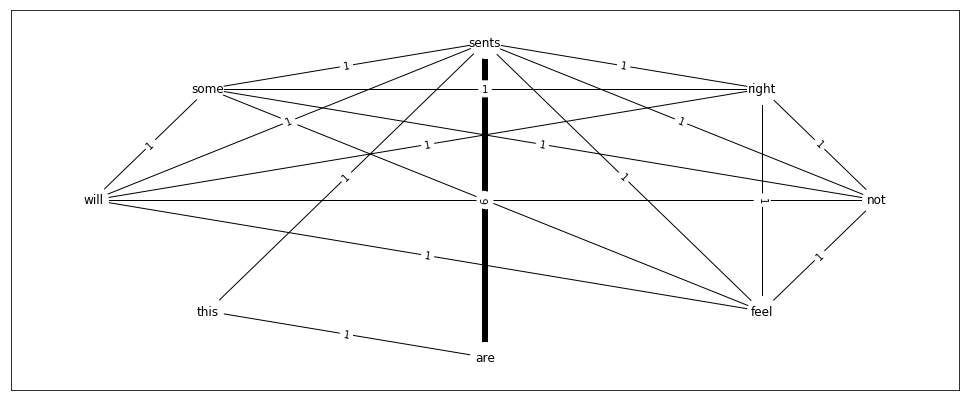

In [122]:
text = 'This are sents. sents are sents sents. Some sents will not feel right. sents are sents.'
# http://www.nltk.org/howto/collocations.html

word2id, id2word, mat = get_coocurrence_matrix(text, window_size = 5, only_forward_window = False, ignore_sentence_bounds = False)
print_cooccurrence_matrix(id2word, mat)
print()
fig, ax = plt.subplots(1, 1, figsize = (17, 7))
plot_cooccurrence_matrix(id2word, mat, ax = ax)
plt.show()

In [124]:
def process(filename, text, **kwargs):
    return (filename, get_coocurrence_matrix(text, **kwargs))

def get_cooccurrence_mats(files, **kwargs):
    file_data = []
    for file in files:
        with open(file) as f:
            file_data.append((file, f.read()))
    mats = Parallel(n_jobs=4)(delayed(process)(*d, **kwargs) for d in file_data)
    return mats

In [125]:
TEXT_DIR = 'extract-concept-graphs/code/data/ng20-single/'
WINDOW_SIZE = 3

times = []
files = glob(TEXT_DIR + '*/*/*.txt')

files = files[:1000]

start = time()
mats = get_cooccurrence_mats(files, window_size = WINDOW_SIZE, only_forward_window = False, ignore_sentence_bounds = False)
print('Time needed: {:.1f}s for {} elements'.format(time() - start, len(files)))

Time needed: 0.3s for 0 elements


In [126]:
import collections
q = collections.deque(maxlen = WINDOW_SIZE)
for i in range(WINDOW_SIZE + 10):
    q.append(i)
for i in q:
    print(i)

10
11
12
